In [1]:
#pip install folium

In [4]:
import numpy as np  
import pandas as pd 
import tensorflow as tf
import glob 
import folium 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
from math import pi
import datetime as dt
import missingno as mn
from sklearn.impute import SimpleImputer
from keras import backend as K
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow import keras
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from collections import Counter
import time
import datetime as dt
from datetime import datetime
import collections
import os 
import pandas as pd 
import seaborn as sns
from matplotlib.pyplot import rcParams
from sklearn import linear_model

In [5]:
weatherData = pd.read_csv('weatherHistory.csv')
weatherData.head(2) 

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.

In [6]:
categorical = weatherData.select_dtypes(include = ["object"]).keys()
print(categorical)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], dtype='object')


In [7]:
quantitative = weatherData.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)'],
      dtype='object')


In [8]:
weatherData[['Date', 'Sec']] = weatherData['Formatted Date'].str.split('+', expand=True)

In [9]:
weatherData.head(1)

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   

                       Daily Summary                      Date   Sec  
0  Partly cloudy throughout the day.  2006-04-01 00:00:00.000   0200

In [10]:

weatherData.drop(['Sec'], axis=1)

Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1             9.355556                  7.227778      0.86            14.2646   
2             9.377778                  9.377778      0.89             3.9284   
3             8.288889                  5.944444      0.83            14.1036   
4             8.755556                  6.977778      0.83            11.0446   
...                ...                       ...       ...                ...   
96448        26.016667                 26.016667      0.43            10.9963   
96449        24.583333                 24.583333      0.48            10.0947   
96450        22.038889                 22.038889      0.56             8.9838   
96451        21.522222                 21.522222      0.60            10.5294   
96452        20.438889                 20.438889      0.61             5.8765   

       Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
0                       251.0          15.8263         0.0   
1                       259.0          15.8263         0.0   
2                       204.0          14.9569         0.0   
3                       269.0          15.8263         0.0   
4                       259.0          15.8263         0.0   
...                       ...              ...         ...   
96448                    31.0          16.1000         0.0   
96449                    20.0          15.5526         0.0   
96450                    30.0          16.1000         0.0   
96451                    20.0          16.1000         0.0   
96452                    39.0          15.5204         0.0   

       Pressure (millibars)                           Daily Summary  \
0                   1015.13       Partly cloudy throughout the day.   
1                   1015.63       Partly cloudy throughout the day.   
2                   1015.94       Partly cloudy throughout the day.   
3                   1016.41       Partly cloudy throughout the day.   
4                   1016.51       Partly cloudy throughout the day.   
...                     ...                                     ...   
96448               1014.36  Partly cloudy starting in the morning.   
96449               1015.16  Partly cloudy starting in the morning.   
96450               1015.66  Partly cloudy starting in the morning.   
96451               1015.95  Partly cloudy starting in the morning.   
96452               1016.16  Partly cloudy starting in the morning.   

                           Date  
0      2006-04-01 00:00:00.000   
1      2006-04-01 01:00:00.000   
2      2006-04-01 02:00:00.000   
3      2006-04-01 03:00:00.000   
4      2006-04-01 04:00:00.000   
...                         ...  
96448  2016-09-09 19:00:00.000   
96449  2016-09-09 20:00:00.000   
96450  2016-09-09 21:00:00.000   
96451  2016-09-09 22:00:00.000   
96452  2016-09-09 23:00:00.000   

[96453 rows x 13 columns]

In [11]:
weatherData[['Time', 'Hour']] = weatherData['Formatted Date'].str.split(' ', n=1, expand=True)

In [12]:
weatherData.head(3)

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   

                       Daily Summary                      Date   Sec  \
0  Partly cloudy throughout the day.  2006-04-01 00:00:00.000   0200   
1  Partly cloudy throughout the day.  2006-04-01 01:00:00.000   0200   
2  Partly cloudy throughout the day.  2006-04-01 02:00:00.000   0200   

         Time                Hour  
0  2006-04-01  00:00:00.000 +0200  
1  2006-04-01  01:00:00.000 +0200  
2  2006-04-01  02:00:00.000 +0200

In [13]:
weatherData.drop(['Date','Sec'], axis=1)

Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1             9.355556                  7.227778      0.86            14.2646   
2             9.377778                  9.377778      0.89             3.9284   
3             8.288889                  5.944444      0.83            14.1036   
4             8.755556                  6.977778      0.83            11.0446   
...                ...                       ...       ...                ...   
96448        26.016667                 26.016667      0.43            10.9963   
96449        24.583333                 24.583333      0.48            10.0947   
96450        22.038889                 22.038889      0.56             8.9838   
96451        21.522222                 21.522222      0.60            10.5294   
96452        20.438889                 20.438889      0.61             5.8765   

       Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
0                       251.0          15.8263         0.0   
1                       259.0          15.8263         0.0   
2                       204.0          14.9569         0.0   
3                       269.0          15.8263         0.0   
4                       259.0          15.8263         0.0   
...                       ...              ...         ...   
96448                    31.0          16.1000         0.0   
96449                    20.0          15.5526         0.0   
96450                    30.0          16.1000         0.0   
96451                    20.0          16.1000         0.0   
96452                    39.0          15.5204         0.0   

       Pressure (millibars)                           Daily Summary  \
0                   1015.13       Partly cloudy throughout the day.   
1                   1015.63       Partly cloudy throughout the day.   
2                   1015.94       Partly cloudy throughout the day.   
3                   1016.41       Partly cloudy throughout the day.   
4                   1016.51       Partly cloudy throughout the day.   
...                     ...                                     ...   
96448               1014.36  Partly cloudy starting in the morning.   
96449               1015.16  Partly cloudy starting in the morning.   
96450               1015.66  Partly cloudy starting in the morning.   
96451               1015.95  Partly cloudy starting in the morning.   
96452               1016.16  Partly cloudy starting in the morning.   

             Time                Hour  
0      2006-04-01  00:00:00.000 +0200  
1      2006-04-01  01:00:00.000 +0200  
2      2006-04-01  02:00:00.000 +0200  
3      2006-04-01  03:00:00.000 +0200  
4      2006-04-01  04:00:00.000 +0200  
...           ...                 ...  
96448  2016-09-09  19:00:00.000 +0200  
96449  2016-09-09  20:00:00.000 +0200  
96450  2016-09-09  21:00:00.000 +0200  
96451  2016-09-09  22:00:00.000 +0200  
96452  2016-09-09  23:00:00.000 +0200  

[96453 rows x 14 columns]

In [14]:
weatherData[['Hour', 'Sec']] = weatherData['Hour'].str.split(' ', expand=True)

In [15]:
weatherData.head(3)

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   

                       Daily Summary                      Date    Sec  \
0  Partly cloudy throughout the day.  2006-04-01 00:00:00.000   +0200   
1  Partly cloudy throughout the day.  2006-04-01 01:00:00.000   +0200   
2  Partly cloudy throughout the day.  2006-04-01 02:00:00.000   +0200   

         Time          Hour  
0  2006-04-01  00:00:00.000  
1  2006-04-01  01:00:00.000  
2  2006-04-01  02:00:00.000

In [16]:
weatherData.drop(['Sec','Date'], axis=1)

Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1             9.355556                  7.227778      0.86            14.2646   
2             9.377778                  9.377778      0.89             3.9284   
3             8.288889                  5.944444      0.83            14.1036   
4             8.755556                  6.977778      0.83            11.0446   
...                ...                       ...       ...                ...   
96448        26.016667                 26.016667      0.43            10.9963   
96449        24.583333                 24.583333      0.48            10.0947   
96450        22.038889                 22.038889      0.56             8.9838   
96451        21.522222                 21.522222      0.60            10.5294   
96452        20.438889                 20.438889      0.61             5.8765   

       Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
0                       251.0          15.8263         0.0   
1                       259.0          15.8263         0.0   
2                       204.0          14.9569         0.0   
3                       269.0          15.8263         0.0   
4                       259.0          15.8263         0.0   
...                       ...              ...         ...   
96448                    31.0          16.1000         0.0   
96449                    20.0          15.5526         0.0   
96450                    30.0          16.1000         0.0   
96451                    20.0          16.1000         0.0   
96452                    39.0          15.5204         0.0   

       Pressure (millibars)                           Daily Summary  \
0                   1015.13       Partly cloudy throughout the day.   
1                   1015.63       Partly cloudy throughout the day.   
2                   1015.94       Partly cloudy throughout the day.   
3                   1016.41       Partly cloudy throughout the day.   
4                   1016.51       Partly cloudy throughout the day.   
...                     ...                                     ...   
96448               1014.36  Partly cloudy starting in the morning.   
96449               1015.16  Partly cloudy starting in the morning.   
96450               1015.66  Partly cloudy starting in the morning.   
96451               1015.95  Partly cloudy starting in the morning.   
96452               1016.16  Partly cloudy starting in the morning.   

             Time          Hour  
0      2006-04-01  00:00:00.000  
1      2006-04-01  01:00:00.000  
2      2006-04-01  02:00:00.000  
3      2006-04-01  03:00:00.000  
4      2006-04-01  04:00:00.000  
...           ...           ...  
96448  2016-09-09  19:00:00.000  
96449  2016-09-09  20:00:00.000  
96450  2016-09-09  21:00:00.000  
96451  2016-09-09  22:00:00.000  
96452  2016-09-09  23:00:00.000  

[96453 rows x 14 columns]

In [17]:
weatherData[['Year', 'Month','Date']] = weatherData['Date'].str.split('-', n=2, expand=True)

In [18]:
weatherData.head(3)

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   

                       Daily Summary              Date    Sec        Time  \
0  Partly cloudy throughout the day.  01 00:00:00.000   +0200  2006-04-01   
1  Partly cloudy throughout the day.  01 01:00:00.000   +0200  2006-04-01   
2  Partly cloudy throughout the day.  01 02:00:00.000   +0200  2006-04-01   

           Hour  Year Month  
0  00:00:00.000  2006    04  
1  01:00:00.000  2006    04  
2  02:00:00.000  2006    04

In [19]:
weatherData.drop(['Sec','Time'], axis=1)

Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1             9.355556                  7.227778      0.86            14.2646   
2             9.377778                  9.377778      0.89             3.9284   
3             8.288889                  5.944444      0.83            14.1036   
4             8.755556                  6.977778      0.83            11.0446   
...                ...                       ...       ...                ...   
96448        26.016667                 26.016667      0.43            10.9963   
96449        24.583333                 24.583333      0.48            10.0947   
96450        22.038889                 22.038889      0.56             8.9838   
96451        21.522222                 21.522222      0.60            10.5294   
96452        20.438889                 20.438889      0.61             5.8765   

       Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
0                       251.0          15.8263         0.0   
1                       259.0          15.8263         0.0   
2                       204.0          14.9569         0.0   
3                       269.0          15.8263         0.0   
4                       259.0          15.8263         0.0   
...                       ...              ...         ...   
96448                    31.0          16.1000         0.0   
96449                    20.0          15.5526         0.0   
96450                    30.0          16.1000         0.0   
96451                    20.0          16.1000         0.0   
96452                    39.0          15.5204         0.0   

       Pressure (millibars)                           Daily Summary  \
0                   1015.13       Partly cloudy throughout the day.   
1                   1015.63       Partly cloudy throughout the day.   
2                   1015.94       Partly cloudy throughout the day.   
3                   1016.41       Partly cloudy throughout the day.   
4                   1016.51       Partly cloudy throughout the day.   
...                     ...                                     ...   
96448               1014.36  Partly cloudy starting in the morning.   
96449               1015.16  Partly cloudy starting in the morning.   
96450               1015.66  Partly cloudy starting in the morning.   
96451               1015.95  Partly cloudy starting in the morning.   
96452               1016.16  Partly cloudy starting in the morning.   

                   Date          Hour  Year Month  
0      01 00:00:00.000   00:00:00.000  2006    04  
1      01 01:00:00.000   01:00:00.000  2006    04  
2      01 02:00:00.000   02:00:00.000  2006    04  
3      01 03:00:00.000   03:00:00.000  2006    04  
4      01 04:00:00.000   04:00:00.000  2006    04  
...                 ...           ...   ...   ...  
96448  09 19:00:00.000   19:00:00.000  2016    09  
96449  09 20:00:00.000   20:00:00.000  2016    09  
96450  09 21:00:00.000   21:00:00.000  2016    09  
96451  09 22:00:00.000   22:00:00.000  2016    09  
96452  09 23:00:00.000   23:00:00.000  2016    09  

[96453 rows x 16 colu

In [20]:
weatherData[['Date','sec']] = weatherData['Date'].str.split(' ', n=1, expand=True)

In [21]:
weatherData.head(1)

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   

                       Daily Summary Date    Sec        Time          Hour  \
0  Partly cloudy throughout the day.   01  +0200  2006-04-01  00:00:00.000   

   Year Month            sec  
0  2006    04  00:00:00.000

In [22]:
weatherData.drop(['Sec','Time','sec'], axis=1)

Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1             9.355556                  7.227778      0.86            14.2646   
2             9.377778                  9.377778      0.89             3.9284   
3             8.288889                  5.944444      0.83            14.1036   
4             8.755556                  6.977778      0.83            11.0446   
...                ...                       ...       ...                ...   
96448        26.016667                 26.016667      0.43            10.9963   
96449        24.583333                 24.583333      0.48            10.0947   
96450        22.038889                 22.038889      0.56             8.9838   
96451        21.522222                 21.522222      0.60            10.5294   
96452        20.438889                 20.438889      0.61             5.8765   

       Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
0                       251.0          15.8263         0.0   
1                       259.0          15.8263         0.0   
2                       204.0          14.9569         0.0   
3                       269.0          15.8263         0.0   
4                       259.0          15.8263         0.0   
...                       ...              ...         ...   
96448                    31.0          16.1000         0.0   
96449                    20.0          15.5526         0.0   
96450                    30.0          16.1000         0.0   
96451                    20.0          16.1000         0.0   
96452                    39.0          15.5204         0.0   

       Pressure (millibars)                           Daily Summary Date  \
0                   1015.13       Partly cloudy throughout the day.   01   
1                   1015.63       Partly cloudy throughout the day.   01   
2                   1015.94       Partly cloudy throughout the day.   01   
3                   1016.41       Partly cloudy throughout the day.   01   
4                   1016.51       Partly cloudy throughout the day.   01   
...                     ...                                     ...  ...   
96448               1014.36  Partly cloudy starting in the morning.   09   
96449               1015.16  Partly cloudy starting in the morning.   09   
96450               1015.66  Partly cloudy starting in the morning.   09   
96451               1015.95  Partly cloudy starting in the morning.   09   
96452               1016.16  Partly cloudy starting in the morning.   09   

               Hour  Year Month  
0      00:00:00.000  2006    04  
1      01:00:00.000  2006    04  
2      02:00:00.000  2006    04  
3      03:00:00.000  2006    04  
4      04:00:00.000  2006    04  
...             ...   ...   ...  
96448  19:00:00.000  2016    09  
96449  20:00:00.000  2016    09  
96450  21:00:00.000  2016    09  
96451  22:00:00.000  2016    09  
96452  23:00:00.000  2016    09  

[96453 rows x 16 columns]

In [23]:
weatherData[['Hour']] = weatherData['Date'].str.split(':',  n=1, expand=True)

In [24]:
weatherData.head(1)

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   

                       Daily Summary Date    Sec        Time Hour  Year Month  \
0  Partly cloudy throughout the day.   01  +0200  2006-04-01   01  2006    04   

             sec  
0  00:00:00.000

In [25]:
weatherDataFinal=weatherData.drop(['Sec','Time','sec'], axis=1)

In [26]:
weatherDataFinal.head(1)

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   

                       Daily Summary Date Hour  Year Month  
0  Partly cloudy throughout the day.   01   01  2006    04

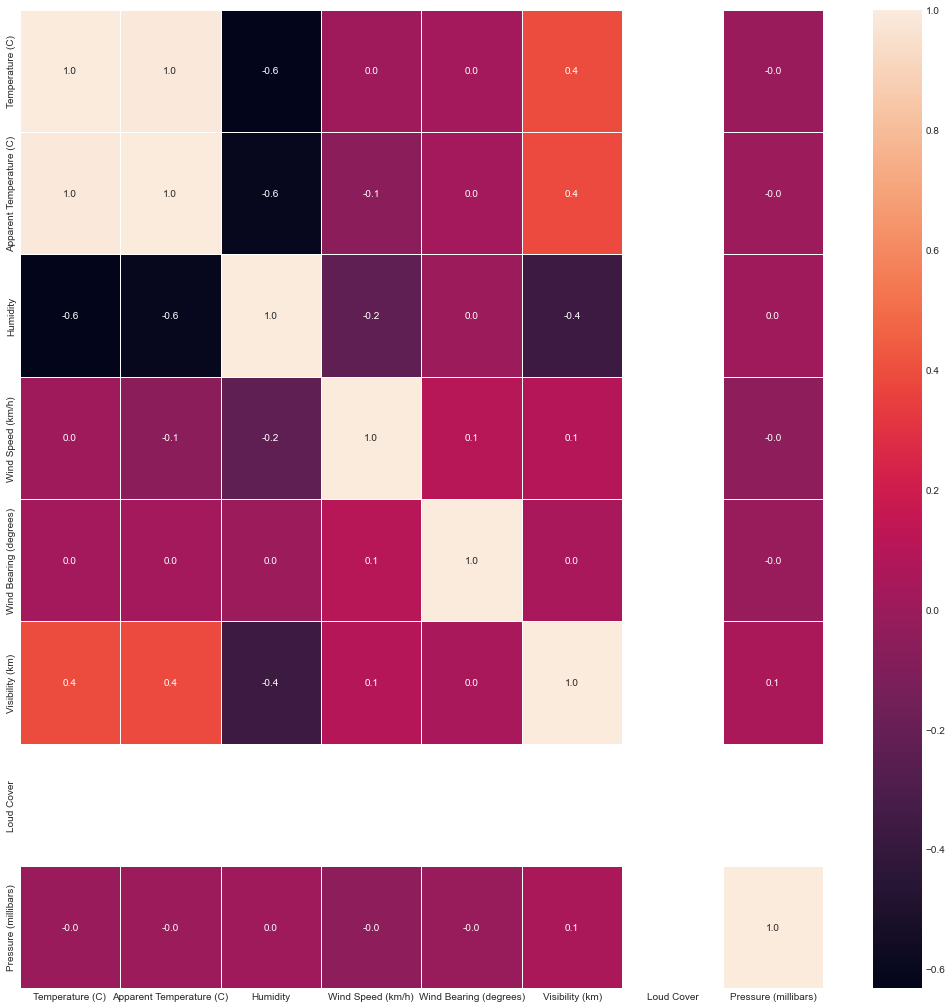

In [27]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(weatherDataFinal.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [28]:
weatherDataFinal[quantitative].describe()

Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       96453.000000            96453.000000     96453.000000     96453.0   
mean           10.810640              187.509232        10.347325         0.0   
std             6.913571              107.383428         4.192123         0.0   
min             0.000000                0.000000         0.000000         0.0   
25%             5.828200              116.000000         8.339800         0.0   
50%             9.965900              180.000000        10.046400         0.0   
75%            14.135800              290.000000        14.812000         0.0   
max            63.852600              359.000000        16.100000         0.0   

       Pressure (millibars)  
count          96453.000000  
mean            1003.235956  
std              116.969906  
min                0.000000  
25%             1011.900000  
50%             1016.450000  
75%             1021.090000  
max             1046.380000

array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Apparent Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>],
       [<AxesSubplot:title={'center':'Wind Speed (km/h)'}>,
        <AxesSubplot:title={'center':'Wind Bearing (degrees)'}>,
        <AxesSubplot:title={'center':'Visibility (km)'}>],
       [<AxesSubplot:title={'center':'Loud Cover'}>,
        <AxesSubplot:title={'center':'Pressure (millibars)'}>,
        <AxesSubplot:>]], dtype=object)

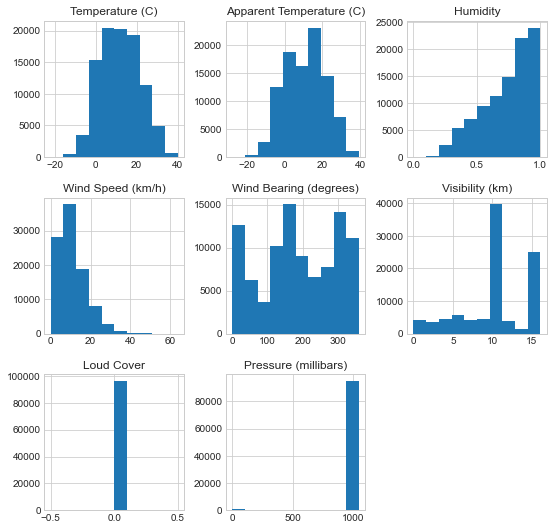

In [29]:
rcParams['figure.figsize'] = 9, 9
weatherDataFinal[quantitative].hist()

In [30]:
weatherDataFinal=weatherDataFinal.drop('Loud Cover',axis=1)

<AxesSubplot:>

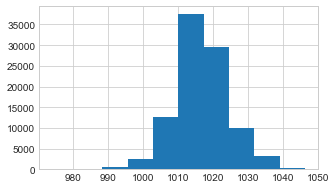

In [31]:
pressure_median = weatherDataFinal['Pressure (millibars)'].median()
      
def pressure(x):
    if x==0:
        return x + pressure_median
    else:
        return x
        
weatherDataFinal["Pressure (millibars)"] = weatherDataFinal.apply(lambda row:pressure(row["Pressure (millibars)"]) , axis = 1)

rcParams['figure.figsize'] = 5, 3
weatherDataFinal['Pressure (millibars)'].hist()

<AxesSubplot:xlabel='count', ylabel='Summary'>

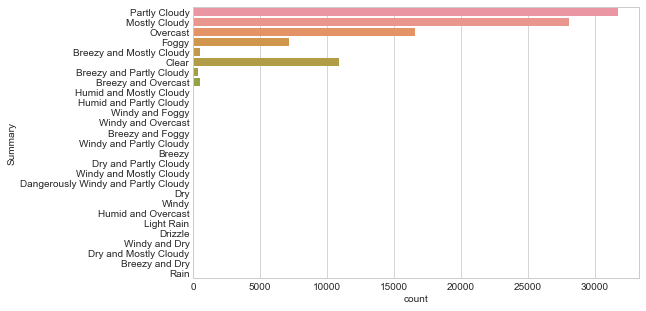

In [32]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(y=weatherDataFinal['Summary'])

In [33]:
weatherDataFinal['Daily Summary'].value_counts(dropna=False)

Mostly cloudy throughout the day.                                                                       20085
Partly cloudy throughout the day.                                                                        9981
Partly cloudy until night.                                                                               6169
Partly cloudy starting in the morning.                                                                   5184
Foggy in the morning.                                                                                    4201
                                                                                                        ...  
Breezy starting overnight continuing until morning and foggy overnight.                                    24
Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.                 24
Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.       24
Rain until

In [34]:
weatherDataFinal['Precip Type'].value_counts(dropna=False)

rain    85224
snow    10712
NaN       517
Name: Precip Type, dtype: int64

In [35]:
weatherDataFinal.fillna(method='ffill', inplace=True)

<AxesSubplot:xlabel='Precip Type', ylabel='count'>

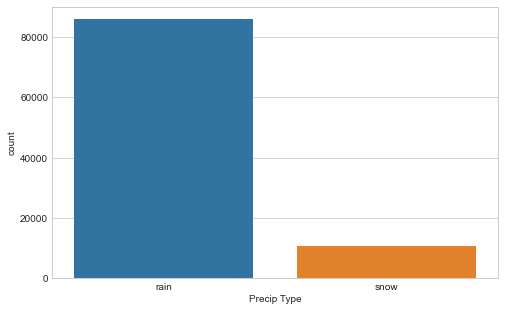

In [36]:
sns.countplot(x=weatherDataFinal['Precip Type'])

In [37]:
totalCells = np.product(weatherDataFinal.shape)

missingCount = weatherDataFinal.isnull().sum()
totalMissing = missingCount.sum()

print("The weather history dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

The weather history dataset contains 0.0 % missing values.


<Figure size 1296x576 with 0 Axes>

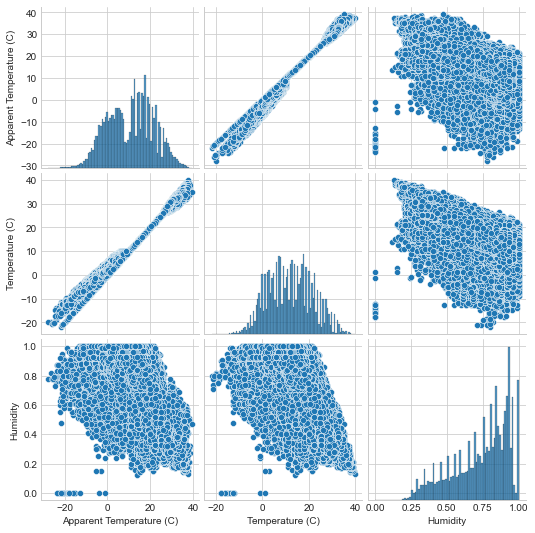

In [38]:
plt.figure(figsize=(18,8)) 
sns.pairplot(weatherDataFinal[['Apparent Temperature (C)','Temperature (C)', 'Humidity' ]])
plt.show()

<Figure size 1296x576 with 0 Axes>

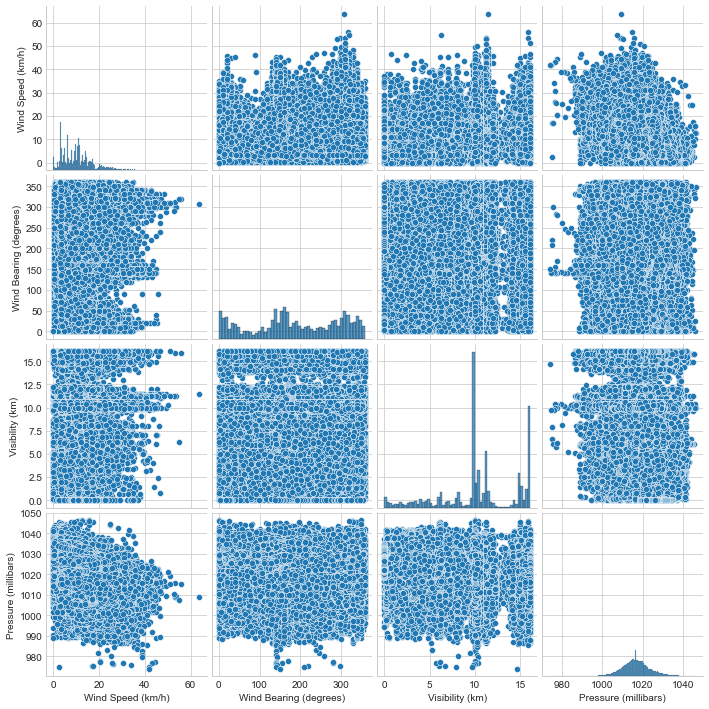

In [39]:
plt.figure(figsize=(18,8)) 
sns.pairplot(weatherDataFinal[['Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']])
plt.show()

# Linear Regression

In [40]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [41]:
LR = linear_model.LinearRegression()

In [42]:
X = weatherDataFinal["Humidity"].values.reshape(-1,1)
y = weatherDataFinal["Temperature (C)"].values.reshape(-1,1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=0)


In [44]:
print("Linear Regression")
LR.fit(X_train, y_train)
print("alpha = ",LR.coef_[0])
print("beta = ",LR.intercept_)
print("\n\nCalculating some regression quality metrics")
y_pred = LR.predict(X_test)
print("MSE = ",mean_squared_error(y_test, y_pred))
print("R2 = ",r2_score(y_test, y_pred))

Linear Regression
alpha =  [-30.86657506]
beta =  [34.61438171]


Calculating some regression quality metrics
MSE =  54.716241119038216
R2 =  0.40040472046870645


# Decision Tree Classifier

In [45]:
def change_category_to_number(DailySummaryCat):
    if DailySummaryCat=='Partly cloudy throughout the day.':
        return 1
    elif DailySummaryCat=='Mostly cloudy throughout the day.':
        return 2
    elif DailySummaryCat=='Foggy in the evening.':
        return 3
    elif DailySummaryCat=='Foggy overnight and breezy in the morning.':
        return 4
    elif DailySummaryCat=='Overcast throughout the day.':
        return 5
    elif DailySummaryCat=='Partly cloudy until night.':
        return 6
    elif DailySummaryCat=='Motly cloudy until night.':
        return 7
    elif DailySummaryCat=='Foggy starting overnight continuing until morning.':
        return 8
    elif DailySummaryCat=='Foggy in the morning.':
        return 9
    elif DailySummaryCat=='Partly cloudy until evening.':
        return 10
    elif DailySummaryCat=='Partly cloudy starting in the morning.':
        return 11
    elif DailySummaryCat=='Mostly cloudy starting overnight continuing until night.':
        return 12
    elif DailySummaryCat=='Partly cloudy starting in the afternoon.':
        return 13
    elif DailySummaryCat=='Partly cloudy starting overnight.':
        return 14
    elif DailySummaryCat=='Mostly cloudy starting overnight.':
        return 15
    elif DailySummaryCat=='Mostly cloudy until night and breezy in the afternoon.':
        return 16
    elif DailySummaryCat=='Mostly cloudy until evening.':
        return 17
    elif DailySummaryCat=='Foggy throughout the day.':
        return 18
    elif DailySummaryCat=='Partly cloudy starting in the morning.':
        return 19
    elif DailySummaryCat=='Partly cloudy starting in the morning continuing until evening.':
        return 20
    elif DailySummaryCat=='Foggy until morning.':
        return 21
    elif DailySummaryCat=='Partly cloudy starting in the morning continuing until night.':
        return 22
    elif DailySummaryCat=='Mostly cloudy starting in the morning.':
        return 23
    elif DailySummaryCat=='Foggy starting in the evening.':
        return 24
    elif DailySummaryCat=='Partly cloudy starting in the afternoon continuing until evening.':
        return 25
    elif DailySummaryCat=='Foggy overnight.':
        return 26
    elif DailySummaryCat=='Clear throughout the day.':
        return 27
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until night.':
        return 28
    elif DailySummaryCat=='Partly cloudy overnight.':
        return 29
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until evening.':
        return 30
    elif DailySummaryCat=='Foggy until night.':
        return 31
    elif DailySummaryCat=='Partly cloudy in the morning.':
        return 32
    elif DailySummaryCat=='Foggy starting overnight continuing until afternoon.':
        return 33
    elif DailySummaryCat=='Foggy until afternoon.':
        return 34
    elif DailySummaryCat=='Breezy and mostly cloudy overnight.':
        return 35
    elif DailySummaryCat=='Partly cloudy overnight and breezy starting in the morning continuing until afternoon.':
        return 36
    elif DailySummaryCat=='Breezy in the morning and foggy in the evening.':
        return 37
    elif DailySummaryCat=='Mostly cloudy until evening and breezy in the evening.':
        return 38
    elif DailySummaryCat=='Mostly cloudy starting in the evening.':
        return 39
    elif DailySummaryCat=='Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.':
        return 40
    elif DailySummaryCat=='Breezy starting in the morning continuing until night.':
        return 41
    elif DailySummaryCat=='Overcast throughout the day and breezy starting overnight continuing until morning.':
        return 42
    elif DailySummaryCat=='Breezy starting overnight continuing until morning and foggy in the evening.':
        return 43
    elif DailySummaryCat=='Light rain until morning.':
        return 44
    elif DailySummaryCat=='Mostly cloudy until night and breezy starting in the afternoon continuing until night.':
        return 45
    elif DailySummaryCat=='Mostly cloudy starting in the morning continuing until afternoon.':
        return 46
    elif DailySummaryCat=='Breezy until afternoon and overcast throughout the day.':
        return 47
    elif DailySummaryCat=='Partly cloudy until evening and breezy in the afternoon.':
        return 48
    elif DailySummaryCat=='Breezy starting overnight continuing until morning and partly cloudy starting overnight continuing until evening.':
        return 49
    elif DailySummaryCat=='Light rain starting overnight.':
        return 50
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until evening and breezy starting in the morning continuing until evening.':
        return 51
    elif DailySummaryCat=='Foggy starting in the morning continuing until evening and breezy in the evening.':
        return 52
    elif DailySummaryCat=='Partly cloudy throughout the day and breezy in the afternoon.':
        return 53
    elif DailySummaryCat=='Mostly cloudy starting overnight continuing until evening and breezy starting overnight continuing until morning.':
        return 54
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until evening and breezy in the morning.':
        return 55
    elif DailySummaryCat=='Overcast throughout the day and breezy overnight.':
        return 56
    elif DailySummaryCat=='Light rain in the morning.':
        return 57
    elif DailySummaryCat=='Rain until morning.':
        return 58
    elif DailySummaryCat=='Breezy in the morning and mostly cloudy starting in the evening.':
        return 59
    elif DailySummaryCat=='Mostly cloudy starting in the morning and breezy overnight.':
        return 60
    elif DailySummaryCat=='Partly cloudy starting overnight and breezy starting in the morning continuing until afternoon.':
        return 61
    elif DailySummaryCat=='Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.':
        return 62
    elif DailySummaryCat=='Partly cloudy starting in the morning continuing until evening and breezy in the afternoon.':
        return 63
    elif DailySummaryCat=='Foggy starting overnight continuing until morning and breezy in the afternoon.':
        return 64

In [46]:
weatherDataFinal['DailySummaryCat'] = weatherDataFinal['Daily Summary'].apply(change_category_to_number)

In [47]:
weatherDataFinal.fillna(method='ffill', inplace=True) 

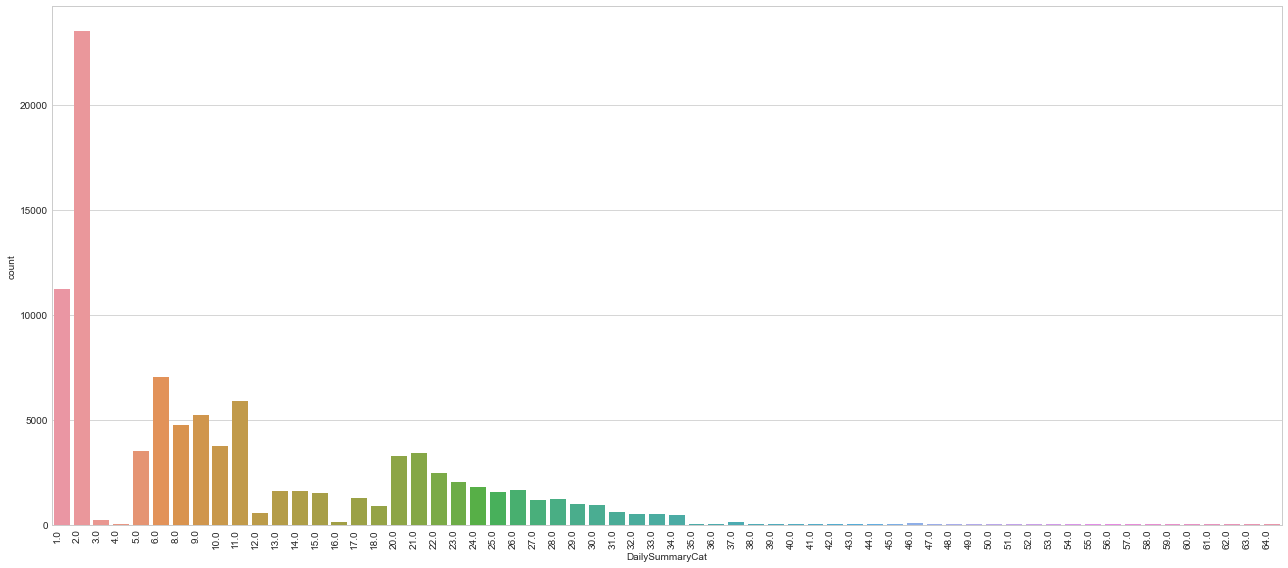

In [48]:
plt.figure(figsize=(18,8)) 
ax = sns.countplot(x=weatherDataFinal['DailySummaryCat'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [49]:
def change_category(Summary):
    if Summary=='Partly Cloudy':
        return 1
    elif Summary=='Mostly Cloudy':
        return 2
    elif Summary=='Foggy':
        return 3
    elif Summary=='Clear':
        return 4
    elif Summary=='Overcast':
        return 5
    elif Summary=='Breezy and Overcast':
        return 6
    elif Summary=='Breezy and Partly Cloudy':
        return 7
    elif Summary=='Breezy and Mostly Cloudy':
        return 8
    elif Summary=='Dry and Partly Cloudy':
        return 9
    elif Summary=='Windy and Partly Cloudy':
        return 10
    elif Summary=='Light Rain':
        return 11
    elif Summary=='Breezy':
        return 12
    elif Summary=='Windy and Overcast':
        return 13
    elif Summary=='Humid and Mostly Cloudy':
        return 14
    elif Summary=='Drizzle':
        return 15
    elif Summary=='Windy and Mostly Cloudy':
        return 16
    elif Summary=='Breezy and Foggy':
        return 17
    elif Summary=='Dry':
        return 18
    elif Summary=='Humid and Partly Cloudy':
        return 19
    elif Summary=='Dry and Mostly Cloudy':
        return 20
    elif Summary=='Rain':
        return 21
    elif Summary=='Windy':
        return 22
    elif Summary=='Humid and Overcast':
        return 23
    elif Summary=='Windy and Foggy':
        return 24
    elif Summary=='Dangerously Windy and Partly Cloudy':
        return 25
    elif Summary=='Windy and Dry':
        return 26
    elif Summary=='Breezy and Dry':
        return 27

In [50]:
weatherDataFinal['SummaryCat'] = weatherDataFinal['Summary'].apply(change_category)

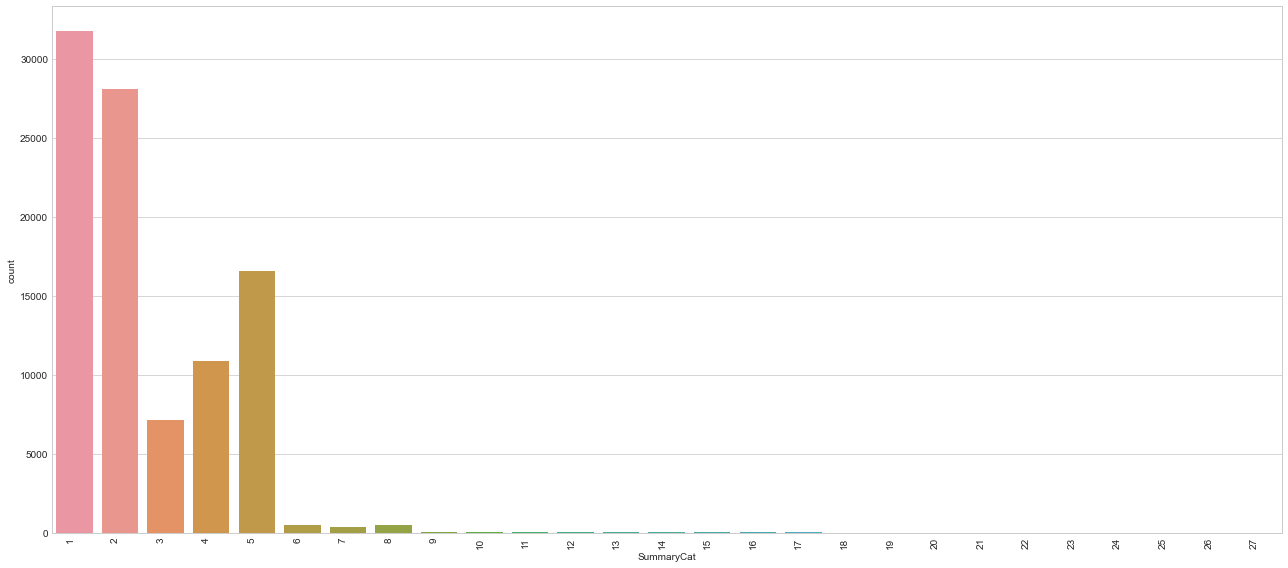

In [51]:
plt.figure(figsize=(18,8)) 
ax = sns.countplot(x=weatherDataFinal['SummaryCat'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [52]:
def change_category(PrecipTypeCat):
    if PrecipTypeCat=='rain':
        return 1
    elif PrecipTypeCat=='snow':
        return 2

In [53]:
weatherDataFinal['PrecipTypeCat'] = weatherDataFinal['Precip Type'].apply(change_category)

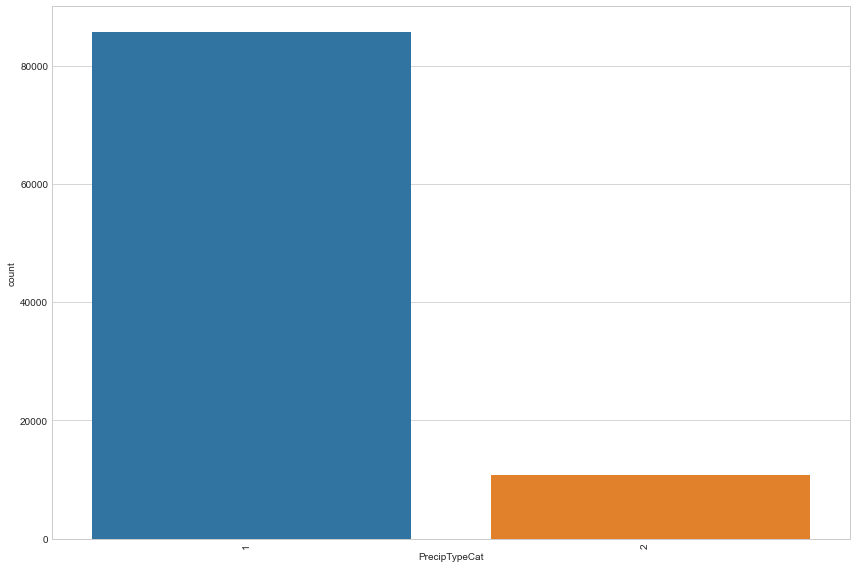

In [54]:
plt.figure(figsize=(12,8)) 
ax = sns.countplot(x=weatherDataFinal['PrecipTypeCat'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [55]:
weatherDataFinal.drop(['Formatted Date','Summary','Daily Summary','Precip Type','Date'],axis=1,inplace=True)


In [56]:
weatherDataFinal.head()

Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0         9.472222                  7.388889      0.89            14.1197   
1         9.355556                  7.227778      0.86            14.2646   
2         9.377778                  9.377778      0.89             3.9284   
3         8.288889                  5.944444      0.83            14.1036   
4         8.755556                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Pressure (millibars) Hour  Year  \
0                   251.0          15.8263               1015.13   01  2006   
1                   259.0          15.8263               1015.63   01  2006   
2                   204.0          14.9569               1015.94   01  2006   
3                   269.0          15.8263               1016.41   01  2006   
4                   259.0          15.8263               1016.51   01  2006   

  Month  DailySummaryCat  SummaryCat  PrecipTypeCat  
0    04              1.0           1              1  
1    04              1.0           1              1  
2    04              1.0           2              1  
3    04              1.0           1              1  
4    04              1.0           2              1

In [57]:
X = weatherDataFinal.drop('DailySummaryCat', axis=1)
y = weatherDataFinal['DailySummaryCat']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=128)

In [59]:
dtClassifer = DecisionTreeClassifier(max_leaf_nodes=15,random_state=0)

In [60]:
dtClassifer.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=15, random_state=0)

In [61]:
prediction = dtClassifer.predict(X_test)

In [62]:
prediction[:100]

array([ 6.,  1.,  2.,  2.,  6.,  2.,  6.,  6.,  2.,  2.,  2.,  1.,  6.,
        2.,  6.,  2.,  1.,  2.,  2., 20.,  2.,  2.,  2.,  6.,  2.,  1.,
        2., 20.,  2.,  1.,  8.,  2.,  2.,  2.,  1.,  1.,  1.,  6.,  6.,
        1.,  2.,  2.,  2.,  1.,  2.,  6.,  6., 20.,  6.,  2.,  2.,  2.,
        2.,  6.,  2.,  6.,  8.,  8.,  1.,  2.,  6.,  2.,  2.,  2.,  6.,
        2.,  1.,  2.,  6.,  1.,  2.,  2.,  2., 20.,  2.,  2.,  2.,  2.,
        1.,  6.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  6., 20.,  2.,
        1.,  2.,  2.,  2.,  2.,  2., 20.,  2., 18.])

In [63]:
y_test[:100]

65391    22.0
95001     6.0
69642     1.0
69570     2.0
4310     20.0
         ... 
16840     6.0
78281     2.0
75344    27.0
14366     2.0
56071    21.0
Name: DailySummaryCat, Length: 100, dtype: float64

In [64]:
accuracy_score(y_true=y_test, y_pred=prediction)

0.29133259607409456

# Logistic Regression

In [65]:
LRClassifier = LogisticRegression()

In [66]:
LRClassifier.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
prediction = LRClassifier.predict(X_test)

In [68]:
prediction[:3000]

array([1., 1., 2., ..., 1., 2., 2.])

In [69]:
y_test[:100]

65391    22.0
95001     6.0
69642     1.0
69570     2.0
4310     20.0
         ... 
16840     6.0
78281     2.0
75344    27.0
14366     2.0
56071    21.0
Name: DailySummaryCat, Length: 100, dtype: float64

In [70]:
accuracy_score(y_true=y_test, y_pred=prediction)

0.2570154824440144

# RandomForestClassifier

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
Wdata = pd.read_csv('weatherHistory.csv')

In [73]:
Wdata.head(1)

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   

                       Daily Summary  
0  Partly cloudy throughout the day.

In [74]:
Wdata.rename(columns = {'Daily Summary':'Weather_summary'}, inplace = True)

In [75]:
Wdata.drop(['Weather_summary'],axis=1,inplace=True)

In [76]:
Wdata.shape

(96453, 11)

In [77]:
Wdata['Loud Cover'].value_counts()

0.0    96453
Name: Loud Cover, dtype: int64

In [78]:
Wdata.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
dtype: int64

In [79]:
Wdata['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [80]:
Wdata['Precip Type'].fillna(method='ffill',inplace=True,axis=0)

In [81]:
Wdata['Precip Type'].value_counts()

rain    85741
snow    10712
Name: Precip Type, dtype: int64

In [82]:
from sklearn.preprocessing import LabelEncoder
LBE = LabelEncoder()
Wdata['Precip Type']=LBE.fit_transform(Wdata['Precip Type'])
Wdata['Summary']=LBE.fit_transform(Wdata['Summary'])

In [83]:
Wdata

Formatted Date  Summary  Precip Type  Temperature (C)  \
0      2006-04-01 00:00:00.000 +0200       19            0         9.472222   
1      2006-04-01 01:00:00.000 +0200       19            0         9.355556   
2      2006-04-01 02:00:00.000 +0200       17            0         9.377778   
3      2006-04-01 03:00:00.000 +0200       19            0         8.288889   
4      2006-04-01 04:00:00.000 +0200       17            0         8.755556   
...                              ...      ...          ...              ...   
96448  2016-09-09 19:00:00.000 +0200       19            0        26.016667   
96449  2016-09-09 20:00:00.000 +0200       19            0        24.583333   
96450  2016-09-09 21:00:00.000 +0200       19            0        22.038889   
96451  2016-09-09 22:00:00.000 +0200       19            0        21.522222   
96452  2016-09-09 23:00:00.000 +0200       19            0        20.438889   

       Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                      7.388889      0.89            14.1197   
1                      7.227778      0.86            14.2646   
2                      9.377778      0.89             3.9284   
3                      5.944444      0.83            14.1036   
4                      6.977778      0.83            11.0446   
...                         ...       ...                ...   
96448                 26.016667      0.43            10.9963   
96449                 24.583333      0.48            10.0947   
96450                 22.038889      0.56             8.9838   
96451                 21.522222      0.60            10.5294   
96452                 20.438889      0.61             5.8765   

       Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
0                       251.0          15.8263         0.0   
1                       259.0          15.8263         0.0   
2                       204.0          14.9569         0.0   
3                       269.0          15.8263         0.0   
4                       259.0          15.8263         0.0   
...                       ...              ...         ...   
96448                    31.0          16.1000         0.0   
96449                    20.0          15.5526         0.0   
96450                    30.0          16.1000         0.0   
96451                    20.0          16.1000         0.0   
96452                    39.0          15.5204         0.0   

       Pressure (millibars)  
0                   1015.13  
1                   1015.63  
2                   1015.94  
3                   1016.41  
4                   1016.51  
...                     ...  
96448               1014.36  
96449               1015.16  
96450               1015.66  
96451               1015.95  
96452               1016.16  

[96453 rows x 11 columns]

In [84]:
Dependent_Variable =Wdata.iloc[:,0] 

In [85]:
Inependent_Variable = Wdata.iloc[:,1:] 

In [86]:
Inependent_Variable.corr() 

Summary  Precip Type  Temperature (C)  \
Summary                   1.000000    -0.115673         0.146658   
Precip Type              -0.115673     1.000000        -0.562620   
Temperature (C)           0.146658    -0.562620         1.000000   
Apparent Temperature (C)  0.142760    -0.565207         0.992629   
Humidity                 -0.113119     0.232113        -0.632255   
Wind Speed (km/h)         0.004258    -0.067928         0.008957   
Wind Bearing (degrees)    0.022789    -0.041984         0.029988   
Visibility (km)           0.140138    -0.312875         0.392847   
Loud Cover                     NaN          NaN              NaN   
Pressure (millibars)      0.143405     0.009008        -0.005447   

                          Apparent Temperature (C)  Humidity  \
Summary                                   0.142760 -0.113119   
Precip Type                              -0.565207  0.232113   
Temperature (C)                           0.992629 -0.632255   
Apparent Temperature (C)                  1.000000 -0.602571   
Humidity                                 -0.602571  1.000000   
Wind Speed (km/h)                        -0.056650 -0.224951   
Wind Bearing (degrees)                    0.029031  0.000735   
Visibility (km)                           0.381718 -0.369173   
Loud Cover                                     NaN       NaN   
Pressure (millibars)                     -0.000219  0.005454   

                          Wind Speed (km/h)  Wind Bearing (degrees)  \
Summary                            0.004258                0.022789   
Precip Type                       -0.067928               -0.041984   
Temperature (C)                    0.008957                0.029988   
Apparent Temperature (C)          -0.056650                0.029031   
Humidity                          -0.224951                0.000735   
Wind Speed (km/h)                  1.000000                0.103822   
Wind Bearing (degrees)             0.103822                1.000000   
Visibility (km)                    0.100749                0.047594   
Loud Cover                              NaN                     NaN   
Pressure (millibars)              -0.049263               -0.011651   

                          Visibility (km)  Loud Cover  Pressure (millibars)  
Summary                          0.140138         NaN              0.143405  
Precip Type                     -0.312875         NaN              0.009008  
Temperature (C)                  0.392847         NaN             -0.005447  
Apparent Temperature (C)         0.381718         NaN             -0.000219  
Humidity                        -0.369173         NaN              0.005454  
Wind Speed (km/h)                0.100749         NaN             -0.049263  
Wind Bearing (degrees)           0.047594         NaN             -0.011651  
Visibility (km)                  1.000000         NaN              0.059818  
Loud Cover                            NaN         NaN                   NaN  
Pressure (millibars)             0.059818         NaN              1.000000

In [87]:
Inependent_Variable.drop('Apparent Temperature (C)',axis=1,inplace=True)

In [88]:
Inependent_Variable

Summary  Precip Type  Temperature (C)  Humidity  Wind Speed (km/h)  \
0           19            0         9.472222      0.89            14.1197   
1           19            0         9.355556      0.86            14.2646   
2           17            0         9.377778      0.89             3.9284   
3           19            0         8.288889      0.83            14.1036   
4           17            0         8.755556      0.83            11.0446   
...        ...          ...              ...       ...                ...   
96448       19            0        26.016667      0.43            10.9963   
96449       19            0        24.583333      0.48            10.0947   
96450       19            0        22.038889      0.56             8.9838   
96451       19            0        21.522222      0.60            10.5294   
96452       19            0        20.438889      0.61             5.8765   

       Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
0                       251.0          15.8263         0.0   
1                       259.0          15.8263         0.0   
2                       204.0          14.9569         0.0   
3                       269.0          15.8263         0.0   
4                       259.0          15.8263         0.0   
...                       ...              ...         ...   
96448                    31.0          16.1000         0.0   
96449                    20.0          15.5526         0.0   
96450                    30.0          16.1000         0.0   
96451                    20.0          16.1000         0.0   
96452                    39.0          15.5204         0.0   

       Pressure (millibars)  
0                   1015.13  
1                   1015.63  
2                   1015.94  
3                   1016.41  
4                   1016.51  
...                     ...  
96448               1014.36  
96449               1015.16  
96450               1015.66  
96451               1015.95  
96452               1016.16  

[96453 rows x 9 columns]

In [89]:
Inependent_Variable.shape

(96453, 9)

In [90]:
from sklearn.model_selection import train_test_split
Inependent_Variable_train,Inependent_Variable_test,Dependent_Variable_train,Dependent_Variable_test = train_test_split(Inependent_Variable,Dependent_Variable,test_size=0.3,random_state=1)

In [91]:
Inependent_Variable_train.shape

(67517, 9)

In [92]:
Inependent_Variable_test.shape

(28936, 9)

In [93]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(max_depth=32,n_estimators=120,random_state=1)


In [ ]:
RF.fit(Inependent_Variable_train,Dependent_Variable_train)

In [ ]:
y_pred = RF.predict(Inependent_Variable_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Dependent_Variable_test, y_pred)

In [ ]:
RF.feature_importances_